Nhóm: 8

Lớp: IE105.O12.CNCL.1

Danh sách thành viên:

|     MSSV |              Họ tên | Đánh Giá |
|---------:|--------------------:|---------:|
| 21522405 | Nguyễn Thị Nhàn     | Tốt      |
| 21522411 | Trần Trọng Nhân     | Tốt      |
| 21522557 | Trần Thanh Sơn      | Tốt      |
| 21522677 | Nguyễn Trí Tín      | Tốt      |
| 21522777 | Trương Quang Tường  | Tốt      |


**LAB 5.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/1vD0i34RVMFKXdvDmnZmejmTQ-tNm5xcB?usp=sharing

## **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Lab4/'

Mounted at /content/drive


In [ ]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

#Loading the data
data0 = pd.read_csv(data_dir + 'urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [ ]:
#Check shape
data0.shape

(10000, 18)

In [ ]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

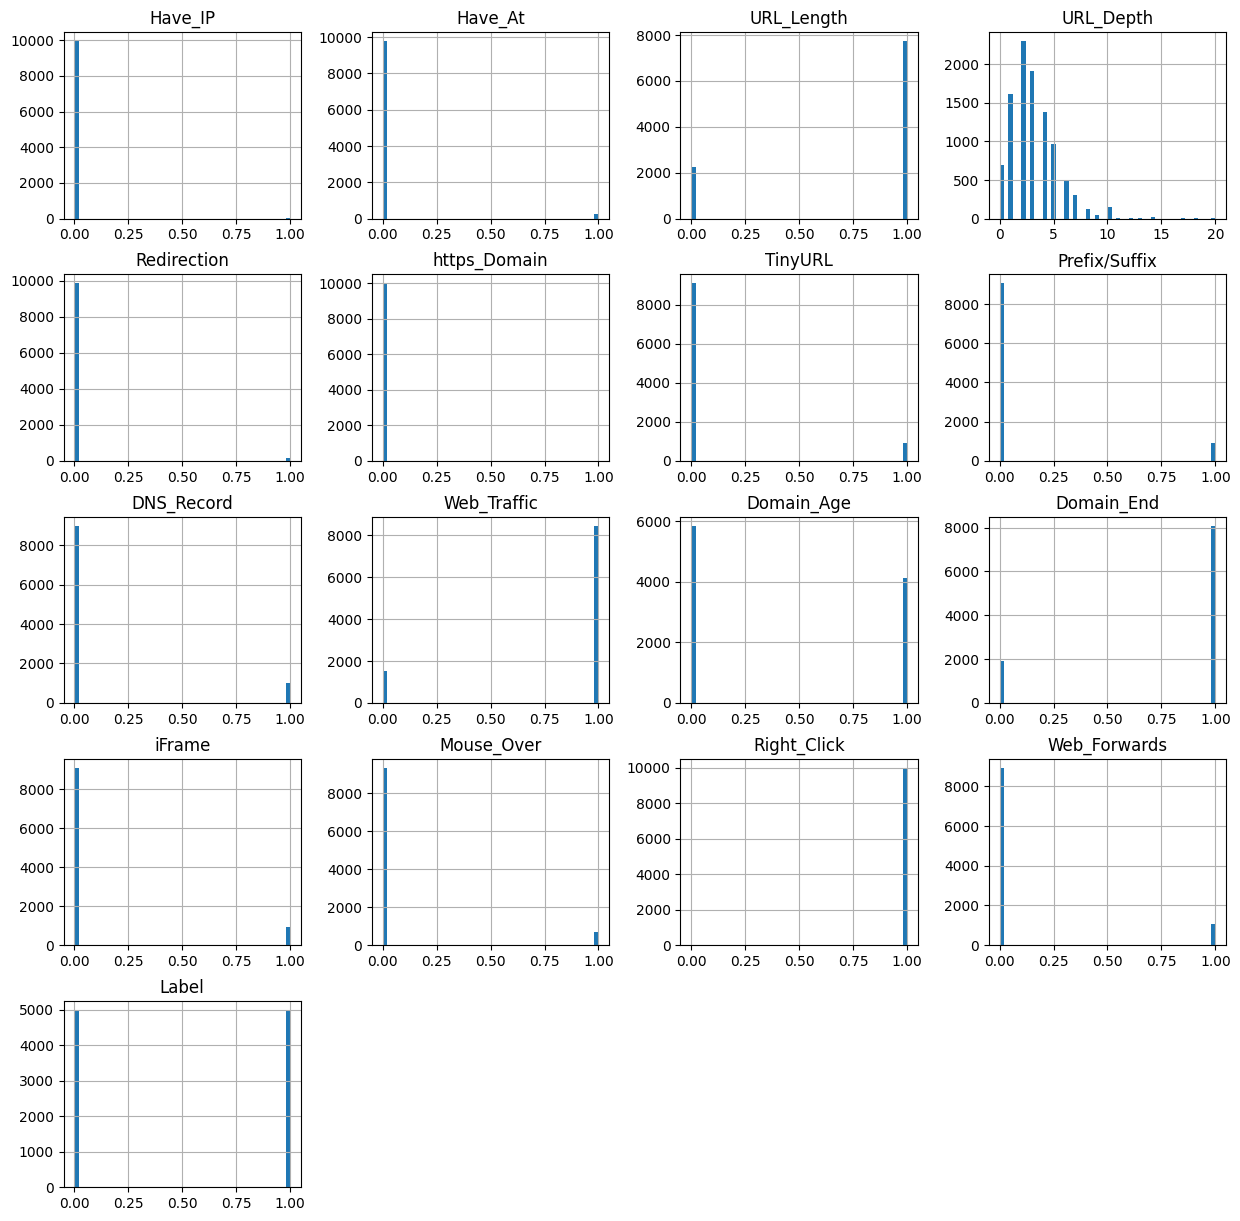

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-8-29e8a59d6953>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


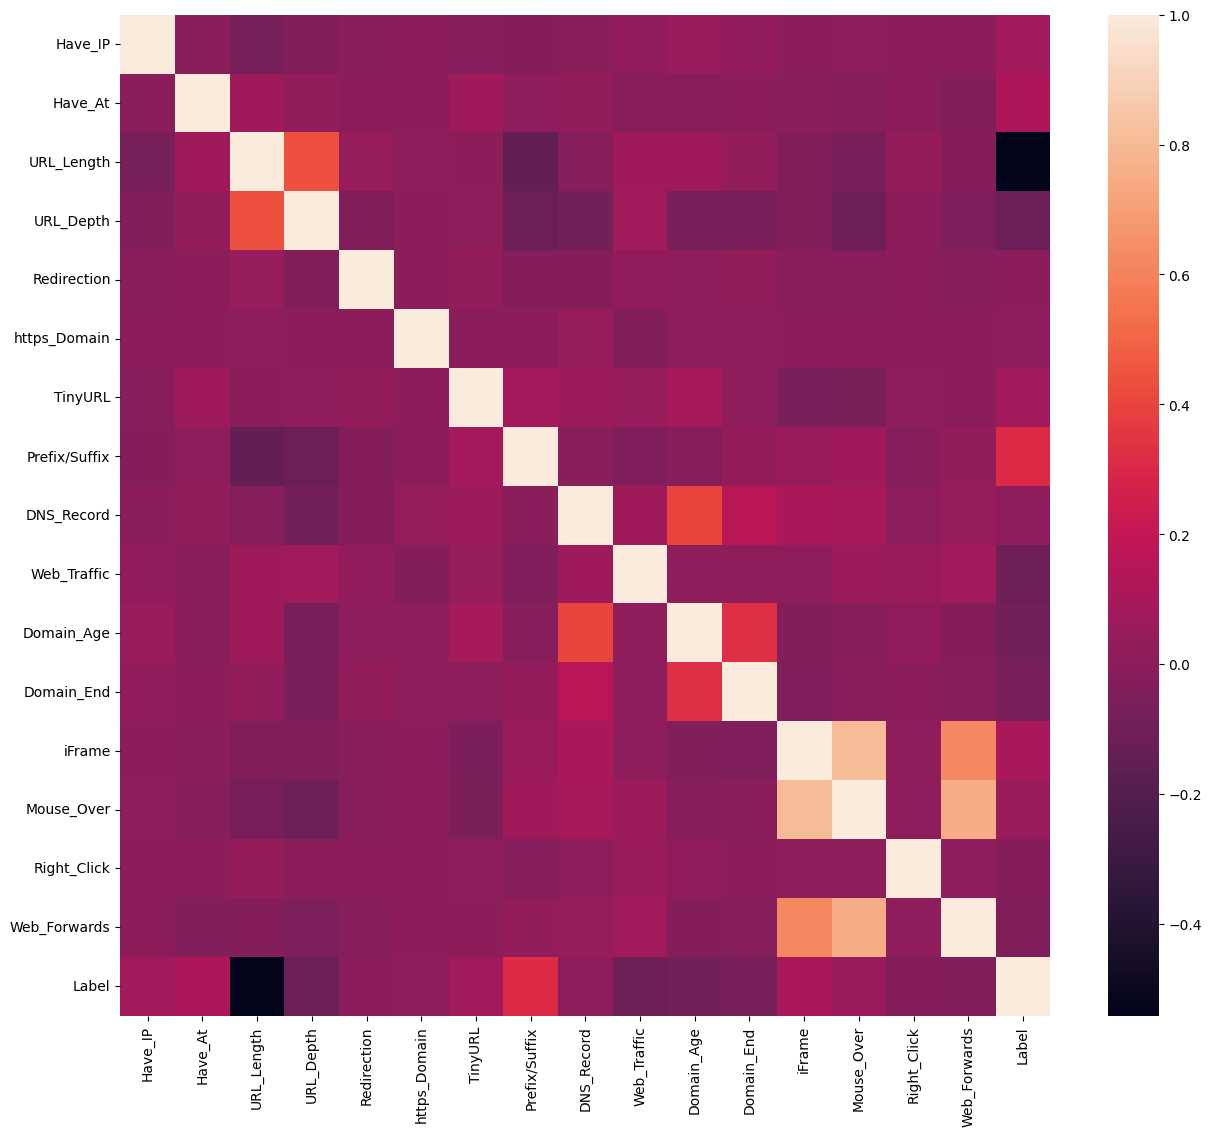

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngoại trừ cột  'Domain' & 'URL_Depth'. Cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [ ]:
#Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [ ]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [ ]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,3,0,0,0,0,0,1,0,1,1,1,1,1,1
1,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,1,0
2,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1


# **6. Chia dữ liệu**

In [ ]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [ ]:
#computing the accuracy
cr_train_tree = classification_report(y_train,y_train_tree)
cr_test_tree = classification_report(y_test,y_test_tree)
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Classification report on training Data  \n",cr_train_tree)
print("Decision Tree: Classification report on test Data \n", cr_test_tree)

Decision Tree: Classification report on training Data  
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      4001
           1       0.98      0.64      0.77      3999

    accuracy                           0.81      8000
   macro avg       0.85      0.81      0.81      8000
weighted avg       0.85      0.81      0.81      8000

Decision Tree: Classification report on test Data 
               precision    recall  f1-score   support

           0       0.74      0.98      0.85       999
           1       0.97      0.67      0.79      1001

    accuracy                           0.82      2000
   macro avg       0.86      0.82      0.82      2000
weighted avg       0.86      0.82      0.82      2000



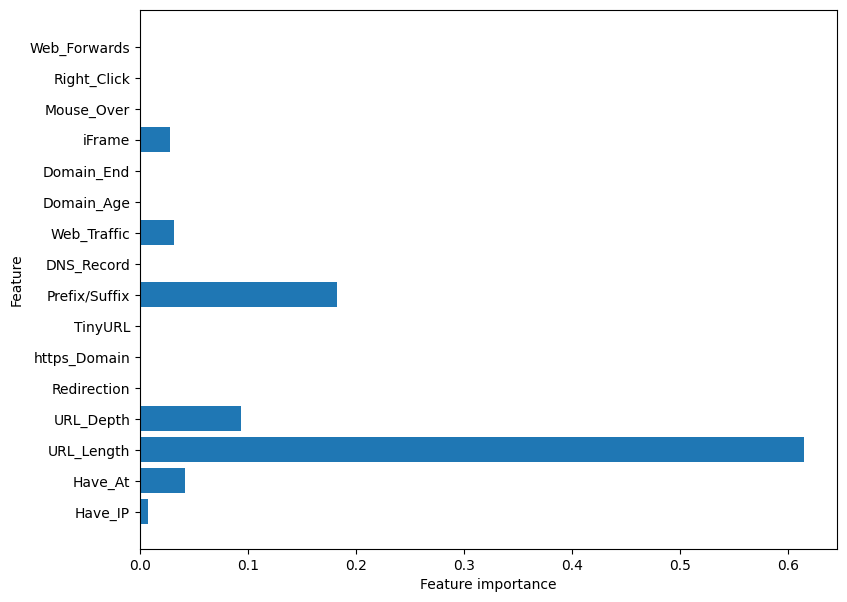

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
cr_train_forest = classification_report(y_train,y_train_forest)
cr_test_forest = classification_report(y_test,y_test_forest)

print("Random forest: Classification report on training Data: \n", cr_train_forest)
print("Random forest: Classification report on test Data: \n", cr_test_forest)

Random forest: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.74      0.99      0.84      4001
           1       0.98      0.65      0.78      3999

    accuracy                           0.82      8000
   macro avg       0.86      0.82      0.81      8000
weighted avg       0.86      0.82      0.81      8000

Random forest: Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       999
           1       0.97      0.67      0.79      1001

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.82      2000
weighted avg       0.86      0.83      0.82      2000



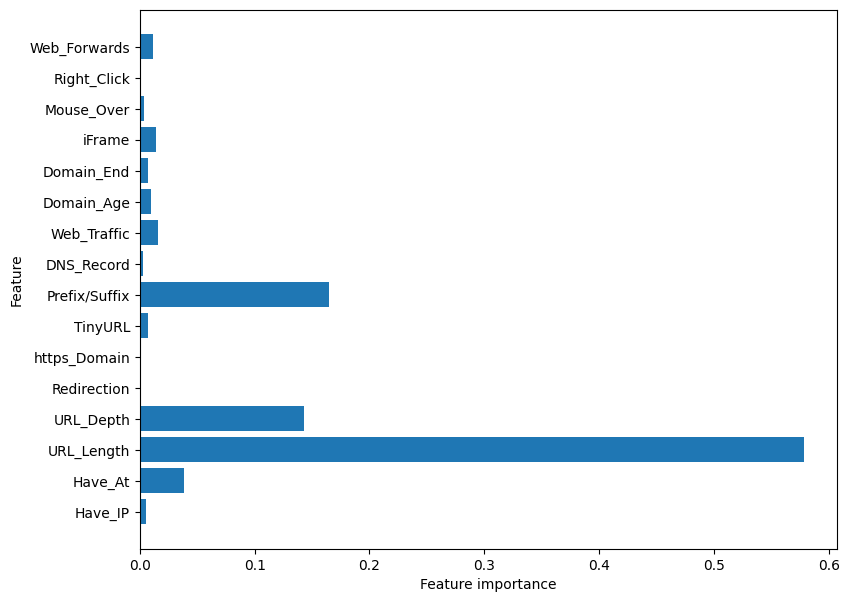

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##**7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
cr_train_mlp = classification_report(y_train,y_train_mlp)
cr_test_mlp = classification_report(y_test,y_test_mlp)

print("Multilayer Perceptrons: Classification report on training Data: \n", cr_train_mlp)
print("Multilayer Perceptrons: Classification report on test Data: \n", cr_test_mlp)

Multilayer Perceptrons: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4001
           1       0.94      0.77      0.85      3999

    accuracy                           0.86      8000
   macro avg       0.87      0.86      0.86      8000
weighted avg       0.87      0.86      0.86      8000

Multilayer Perceptrons: Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       999
           1       0.94      0.78      0.85      1001

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



**Lưu trữ kết quả**

In [ ]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
cr_train_xgb = classification_report(y_train,y_train_mlp)
cr_test_xgb = classification_report(y_test,y_test_mlp)

print("XGBoost: Classification report on training Data: \n",cr_train_xgb)
print("XGBoost : Classification report on test Data: \n",cr_test_xgb)

XGBoost: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4001
           1       0.94      0.77      0.85      3999

    accuracy                           0.86      8000
   macro avg       0.87      0.86      0.86      8000
weighted avg       0.87      0.86      0.86      8000

XGBoost : Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       999
           1       0.94      0.78      0.85      1001

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



**Lưu trữ kết quả**

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Deep Neural Network**
***Bài tập số 1: Hoàn thành huấn luyện mô hình DNN.***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Convert binary labels to one-hot encoded categorical labels
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Define the model
model = Sequential()

# Add input layer and first hidden layer
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with validation data
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 306 (1.20 KB)
Trainable params: 306 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.6667 - accuracy: 0.6389 - val_loss: 0.6093 - val_accuracy: 0.7720
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7795 - val_loss: 0.5031 - val_accuracy: 0.8025
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7910 - val_loss: 0.4467 - val_accuracy: 0.7

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train_label = np.argmax(y_pred_train, axis=-1)
y_pred_test_label = np.argmax(y_pred_test, axis=-1)
y_pred_test_label

63/63 [==============================] - 0s 2ms/step


array([0, 0, 1, ..., 1, 1, 1])

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_dnn = accuracy_score(y_train,y_pred_train_label)
acc_test_dnn = accuracy_score(y_test,y_pred_test_label)
cr_train_dnn = classification_report(y_train,y_pred_train_label)
cr_test_dnn = classification_report(y_test,y_pred_test_label)

print("Deep Neural Network: Classification report on training Data: \n",cr_train_dnn)
print("Deep Neural Network : Classification report on test Data: \n",cr_test_dnn)

Deep Neural Network: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      4001
           1       0.92      0.66      0.77      3999

    accuracy                           0.80      8000
   macro avg       0.83      0.80      0.80      8000
weighted avg       0.83      0.80      0.80      8000

Deep Neural Network : Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       999
           1       0.90      0.70      0.79      1001

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000



**Lưu trữ kết quả**

In [ ]:
storeResults('Deep Neural Network', acc_train_dnn, acc_test_dnn)

## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyến mô hình SVM.***

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.1)
# fit
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
#predicting
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
cr_train_svm = classification_report(y_train,y_train_svm)
cr_test_svm = classification_report(y_test,y_test_svm)

print("Support Vector Machines: Classification report on training Data: \n",cr_train_svm)
print("Support Vector Machines : Classification report on test Data: \n",cr_test_svm)

Support Vector Machines: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.72      0.98      0.83      4001
           1       0.97      0.62      0.75      3999

    accuracy                           0.80      8000
   macro avg       0.84      0.80      0.79      8000
weighted avg       0.84      0.80      0.79      8000

Support Vector Machines : Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.73      0.97      0.84       999
           1       0.96      0.65      0.77      1001

    accuracy                           0.81      2000
   macro avg       0.85      0.81      0.80      2000
weighted avg       0.85      0.81      0.80      2000



**Lưu trữ kết quả**

In [ ]:
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

# **8. So sánh các mô hình**

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.811,0.822
1,Random Forest,0.818,0.826
2,Multilayer Perceptrons,0.860,0.866
3,XGBoost,0.866,0.868
4,Deep Neural Network,0.804,0.812
5,Support Vector Machines,0.799,0.810


In [ ]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.866,0.868
2,Multilayer Perceptrons,0.860,0.866
1,Random Forest,0.818,0.826
0,Decision Tree,0.811,0.822
4,Deep Neural Network,0.804,0.812
5,Support Vector Machines,0.799,0.810


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

In [ ]:
import pickle

with open("xgb_model1.pkl", "wb") as f:
  pickle.dump(xgb, f)

In [ ]:
!ls

drive  sample_data  xgb_model1.pkl


# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 5.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hớp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv'

## **1.1. Phishing URLs:**

In [ ]:
import pandas as pd

In [ ]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv

--2023-12-28 03:32:22--  http://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.16.101.75, 104.17.177.85, 2606:4700::6810:654b, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.16.101.75|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.phishtank.com/data/online-valid.csv [following]
--2023-12-28 03:32:22--  https://data.phishtank.com/data/online-valid.csv
Connecting to data.phishtank.com (data.phishtank.com)|104.16.101.75|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1703734352&Signature=BIwcssj6stGBvbmpASGURKZWv56GgiBTZXvE6EzjASJh1yHuMnz6E0Z5Jqa5LJjxXV3CfPrveLyQ2VcEn9ZOkojApfu-taou8-tL4cHUdFh2lHHYegZD06bn4hFc2ACWpXbYSfKSJP0VnTRvJPpt0kTJpm4skW3JMRJbsGBlbeGBFRFZCeQdD4MbevuhMtx8WQqM9c2iMDhO1~SWA4gwFKlsyBACENDFX2aR1rRBSzMqSjUFBLNV4e~Rkm3fwvncVj3Ln7Hupq20qwJKjr77T7FixWAw91tDkyORb

In [ ]:
#Load CSV
data0 = pd.read_csv("online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8404902,https://cloudflare-ipfs.com/ipfs/bafybeihhl6v6...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-28T03:01:48+00:00,yes,2023-12-28T03:10:03+00:00,yes,Other
1,8404901,https://insta-security-verefication.000webhost...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-28T03:01:43+00:00,yes,2023-12-28T03:10:03+00:00,yes,Other
2,8404883,https://bafkreihka7oqw5p5vkywn7toeyt37vsukczg7...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-28T03:00:31+00:00,yes,2023-12-28T03:10:03+00:00,yes,Other
3,8404882,https://cf-ipfs.com/ipfs/bafkreihka7oqw5p5vkyw...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-28T03:00:30+00:00,yes,2023-12-28T03:10:03+00:00,yes,Other
4,8404881,http://user-photo-jbh.000webhostapp.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-28T03:00:25+00:00,yes,2023-12-28T03:10:03+00:00,yes,Other


In [ ]:
data0.shape

(39723, 8)

Chọn ngẫu nhiên 5000 mẫu.

In [ ]:
phishurl = data0.sample(n = 5000, random_state = 42).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8400747,http://twenty4ventures.com/dpo.html,http://www.phishtank.com/phish_detail.php?phis...,2023-12-22T18:37:16+00:00,yes,2023-12-22T18:43:04+00:00,yes,Other
1,7454238,https://script.google.com/macros/s/AKfycbxLDfM...,http://www.phishtank.com/phish_detail.php?phis...,2022-02-28T13:22:49+00:00,yes,2022-03-01T05:52:50+00:00,yes,Internal Revenue Service
2,8388656,https://swisscomservices.statslive.info/c/6099...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-11T10:48:24+00:00,yes,2023-12-11T11:23:26+00:00,yes,Other
3,8040399,http://sx3er3r.hyperphp.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-02-17T15:56:55+00:00,yes,2023-02-17T16:03:51+00:00,yes,Other
4,8130968,https://helpid9485723849185962813.web.app/,http://www.phishtank.com/phish_detail.php?phis...,2023-04-28T02:24:18+00:00,yes,2023-04-28T02:25:48+00:00,yes,Other


In [ ]:
phishurl.shape

(5000, 8)

## **1.2. Legitimate URLs:**

In [ ]:
#Load legitimate files
data1 = pd.read_csv(data_dir + "Benign_list.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
#Collec 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 5000, random_state = 42).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://correios.com.br/Para-governo/tribunais-...
1,http://caixa.gov.br/voce/habitacao/financiamen...
2,http://olx.ua/uk/list/q-%D0%BF%D0%BB%D0%B0%D1%...
3,http://emgn.com/entertainment/10-films-that-en...
4,http://metro.co.uk/2015/04/11/one-direction-re...


In [ ]:
legiurl.shape

(5000, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar
* Domain
* HTML & Javascript

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [ ]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
# 1.Domain
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
          domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [ ]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [ ]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [ ]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
# 7. https_Domain
def httpDomain(url):
  domain = urlparse(url).scheme
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [ ]:
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103246 sha256=ccb8bc11e72339f5f0a1faea0349edb2686e3a8cd539480261e5f9e0c512bc45
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


In [ ]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS_Record
# obtained in the featureExtraction function

In [ ]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [ ]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [ ]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [ ]:
import requests

In [ ]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [ ]:
# 16.Check Mouse_Over
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [ ]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [ ]:
# 18.Check Web_Forwards
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [ ]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  #features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))

  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)

  return features

## **3.1 URL hợp pháp**

In [ ]:
legiurl.shape

(5000, 1)

In [ ]:
legi_features = []
label = 0

for i in range(0, 10):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,correios.com.br,0,0,1,4,0,0,0,0,0,1,1,0,0,1,0,0
1,caixa.gov.br,0,0,1,6,0,0,0,0,0,1,1,1,1,1,1,0
2,olx.ua,0,0,1,4,0,0,0,0,0,1,0,0,0,1,1,0
3,emgn.com,0,0,1,2,0,0,0,0,0,1,1,1,1,1,1,0
4,metro.co.uk,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
legitimate.to_csv('legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [ ]:
phishurl.shape

(5000, 8)

In [ ]:
phish_features = []
label = 1
for i in range(0, 10):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,twenty4ventures.com,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1
1,script.google.com,0,0,1,4,0,1,0,0,0,1,1,0,0,1,0,1
2,swisscomservices.statslive.info,0,0,1,3,0,1,0,0,0,0,1,0,0,1,0,1
3,sx3er3r.hyperphp.com,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,helpid9485723849185962813.web.app,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1


In [ ]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [ ]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,correios.com.br,0,0,1,4,0,0,0,0,0,1,1,0,0,1,0,0
1,caixa.gov.br,0,0,1,6,0,0,0,0,0,1,1,1,1,1,1,0
2,olx.ua,0,0,1,4,0,0,0,0,0,1,0,0,0,1,1,0
3,emgn.com,0,0,1,2,0,0,0,0,0,1,1,1,1,1,1,0
4,metro.co.uk,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
15,pub-f78cef456d7747e4ae9ccee36ca02aed.r2.dev,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1
16,linktr.ee,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
17,electrocoolhvacr.com,0,0,1,3,0,0,0,0,0,0,0,0,0,1,0,1
18,suspensiones0011.webcindario.com,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
19,hello-world-black-sun-98d6.coltchs43.workers.dev,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1


In [ ]:
urldata.shape

(20, 17)

In [ ]:
urldata.to_csv('urldata.csv', index=False)

Ta trích xuất được 18 thuộc tính với 10,000 rows trong đó có  5000 phishing  & 5000 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 5.2, chọn một tập dataset khác thực hiện lại Lab 5.1***

# **2. Tải dữ liệu**

In [ ]:
!wget "https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded" -O phis_legit.csv


--2023-12-28 03:35:32--  https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/67a1578a-90d9-4183-8e50-3ec9416561f0 [following]
--2023-12-28 03:35:33--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/67a1578a-90d9-4183-8e50-3ec9416561f0
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.106.144, 52.218.121.210, 52.92.36.2, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.106.144|

In [ ]:
import pandas as pd

data = pd.read_csv("phis_legit.csv")
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
data.shape


(11430, 89)

In [ ]:
# Map values using a dictionary
status_mapping = {'phishing': 1, 'legitimate': 0}
data['status'] = data['status'].map(status_mapping)
df = data[['url','status']]
df

,url,status
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0
...,...,...
11425,http://www.fontspace.com/category/blackletter,0
11426,http://www.budgetbots.com/server.php/Server%20...,1
11427,https://www.facebook.com/Interactive-Televisio...,0
11428,http://www.mypublicdomainpictures.com/,0


In [ ]:
phis_df = df[df['status'] == 1]
legit_df = df[df['status'] == 0]
phis_df

,url,status
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
5,http://appleid.apple.com-app.es/,1
7,http://www.shadetreetechnology.com/V4/validati...,1
13,http://html.house/l7ceeid6.html,1
...,...,...
11418,http://www.heinzreber.net/homeflash1.html,1
11421,http://www.peoplemakingplaces.com/includes/Sup...,1
11423,http://www.dmega.co.kr/dmega/data/qna/sec/page...,1
11426,http://www.budgetbots.com/server.php/Server%20...,1


In [ ]:
phishurl = phis_df.sample(n = 50, random_state = 42).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,url,status
0,https://support-appleld.com.secureupdate.duila...,1
1,http://cupkaju.wz.sk/5404F71C9393DB6077004355B...,1
2,https://data-and-the-world.onrender.com/posts/...,1
3,http://kam-net.ci/1738312771/956060147/home.php,1
4,http://wms.santander.com-mx-servicio.tenetmx.com,1


In [ ]:
phish_features = []
label = 1
for i in range(0, 50):
  print(i)
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

0
1
2
3
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
4
5
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
Error trying to connect to socket: closing socket - [Errno 113] No route to host
28
29
30
31
32
33
34
35
36
37
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,support-appleld.com.secureupdate.duilawyeryork...,0,0,1,2,0,1,0,1,0,1,1,1,1,1,1,1
1,cupkaju.wz.sk,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,data-and-the-world.onrender.com,0,0,1,2,0,1,0,1,1,1,1,0,0,1,0,1
3,kam-net.ci,0,0,0,3,0,0,0,1,0,1,1,1,1,1,1,1
4,wms.santander.com-mx-servicio.tenetmx.com,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1


In [ ]:
legiturl = legit_df.sample(n = 50, random_state = 42).copy()
legiturl = legiturl.reset_index(drop=True)
legiturl.head()

,url,status
0,https://www.wickman.net.au/provenance.aspx,0
1,https://www.circulationfoundation.org.uk/help-...,0
2,http://www.altiusdirectory.com/Sports/australi...,0
3,https://serverfault.com/questions/385893/how-t...,0
4,http://searchtelecom.techtarget.com/definition...,0


In [ ]:
legi_features = []
label = 0

for i in range(0, 50):
  print(i)
  url = legiturl['url'][i]
  legi_features.append(featureExtraction(url,label))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,wickman.net.au,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0
1,circulationfoundation.org.uk,0,0,1,2,0,1,0,0,0,0,1,0,0,1,0,0
2,altiusdirectory.com,0,0,1,2,0,0,0,0,0,1,1,0,0,1,0,0
3,serverfault.com,0,0,1,3,0,1,1,0,0,1,0,0,0,1,0,0
4,searchtelecom.techtarget.com,0,0,1,2,0,0,1,0,0,1,1,1,1,1,1,0


In [ ]:
import pandas as pd

# Merge two DataFrames named 'legitimate' and 'phishing'
data0 = pd.concat([legitimate, phishing]).reset_index(drop=True)


# Display the first few rows of the shuffled DataFrame
data0

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,wickman.net.au,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0
1,circulationfoundation.org.uk,0,0,1,2,0,1,0,0,0,0,1,0,0,1,0,0
2,altiusdirectory.com,0,0,1,2,0,0,0,0,0,1,1,0,0,1,0,0
3,serverfault.com,0,0,1,3,0,1,1,0,0,1,0,0,0,1,0,0
4,searchtelecom.techtarget.com,0,0,1,2,0,0,1,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,support-appleld.com.secureupdate.duilawyeryork...,0,0,1,2,0,1,0,1,0,1,1,1,1,1,1,1
96,domwin-pjf2hfmn.github.io,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1
97,m.hf356.com,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
98,google.com,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [ ]:
#Check shape
data0.shape

(100, 17)

In [ ]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         100 non-null    object
 1   Have_IP        100 non-null    int64 
 2   Have_At        100 non-null    int64 
 3   URL_Length     100 non-null    int64 
 4   URL_Depth      100 non-null    int64 
 5   Redirection    100 non-null    int64 
 6   https_Domain   100 non-null    int64 
 7   TinyURL        100 non-null    int64 
 8   Prefix/Suffix  100 non-null    int64 
 9   DNS_Record     100 non-null    int64 
 10  Domain_Age     100 non-null    int64 
 11  Domain_End     100 non-null    int64 
 12  iFrame         100 non-null    int64 
 13  Mouse_Over     100 non-null    int64 
 14  Right_Click    100 non-null    int64 
 15  Web_Forwards   100 non-null    int64 
 16  Label          100 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 13.4+ KB


# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

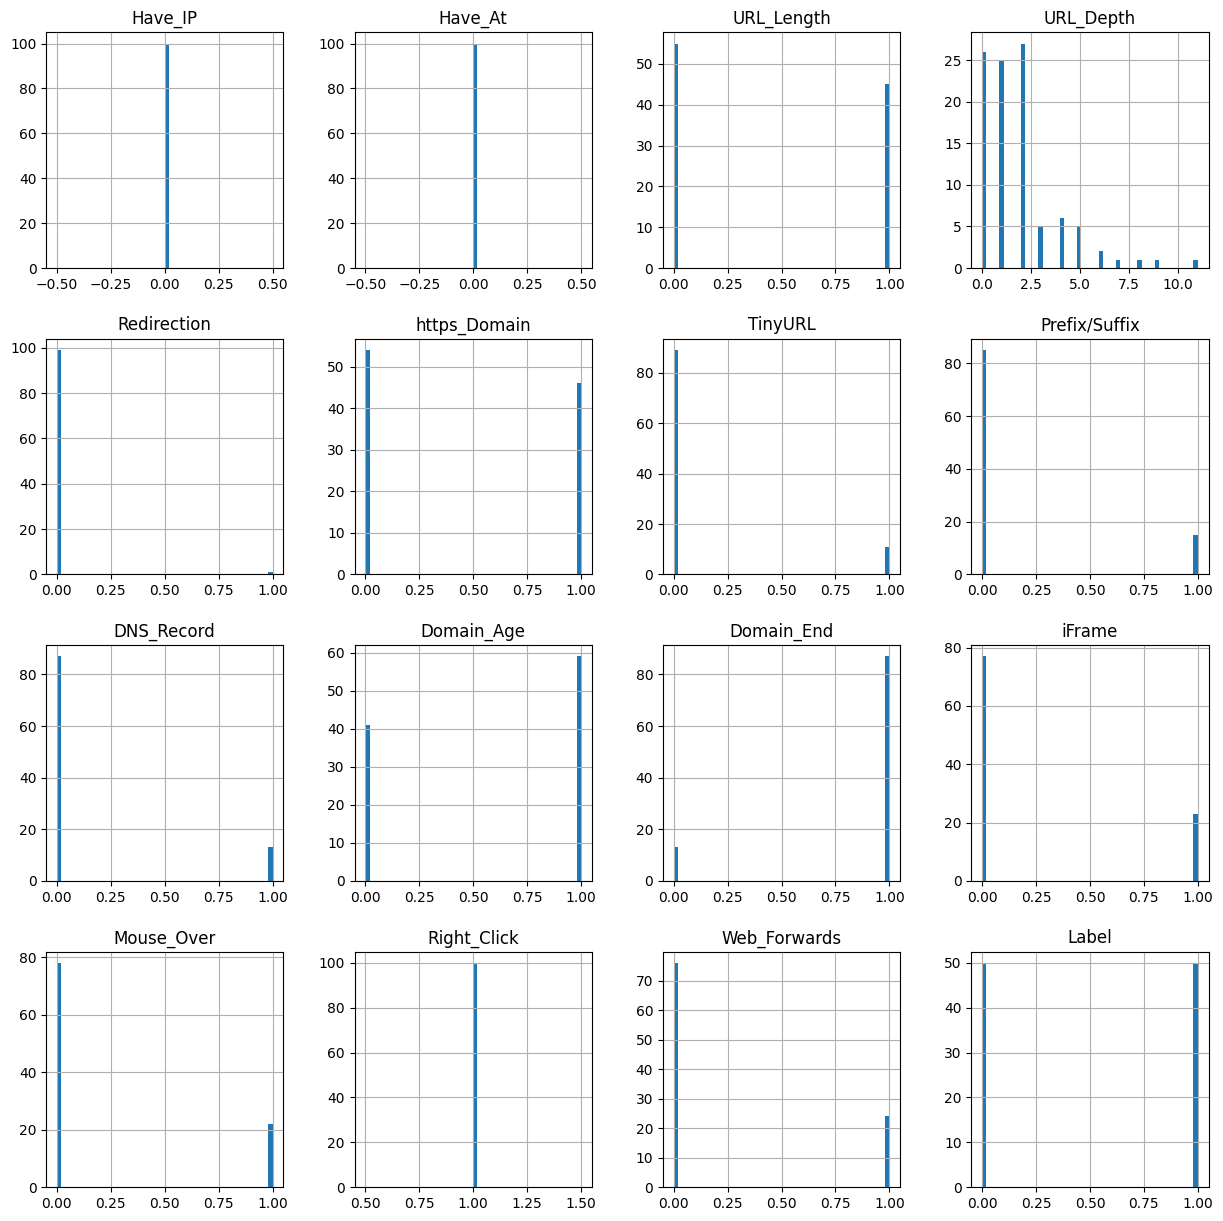

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-106-29e8a59d6953>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


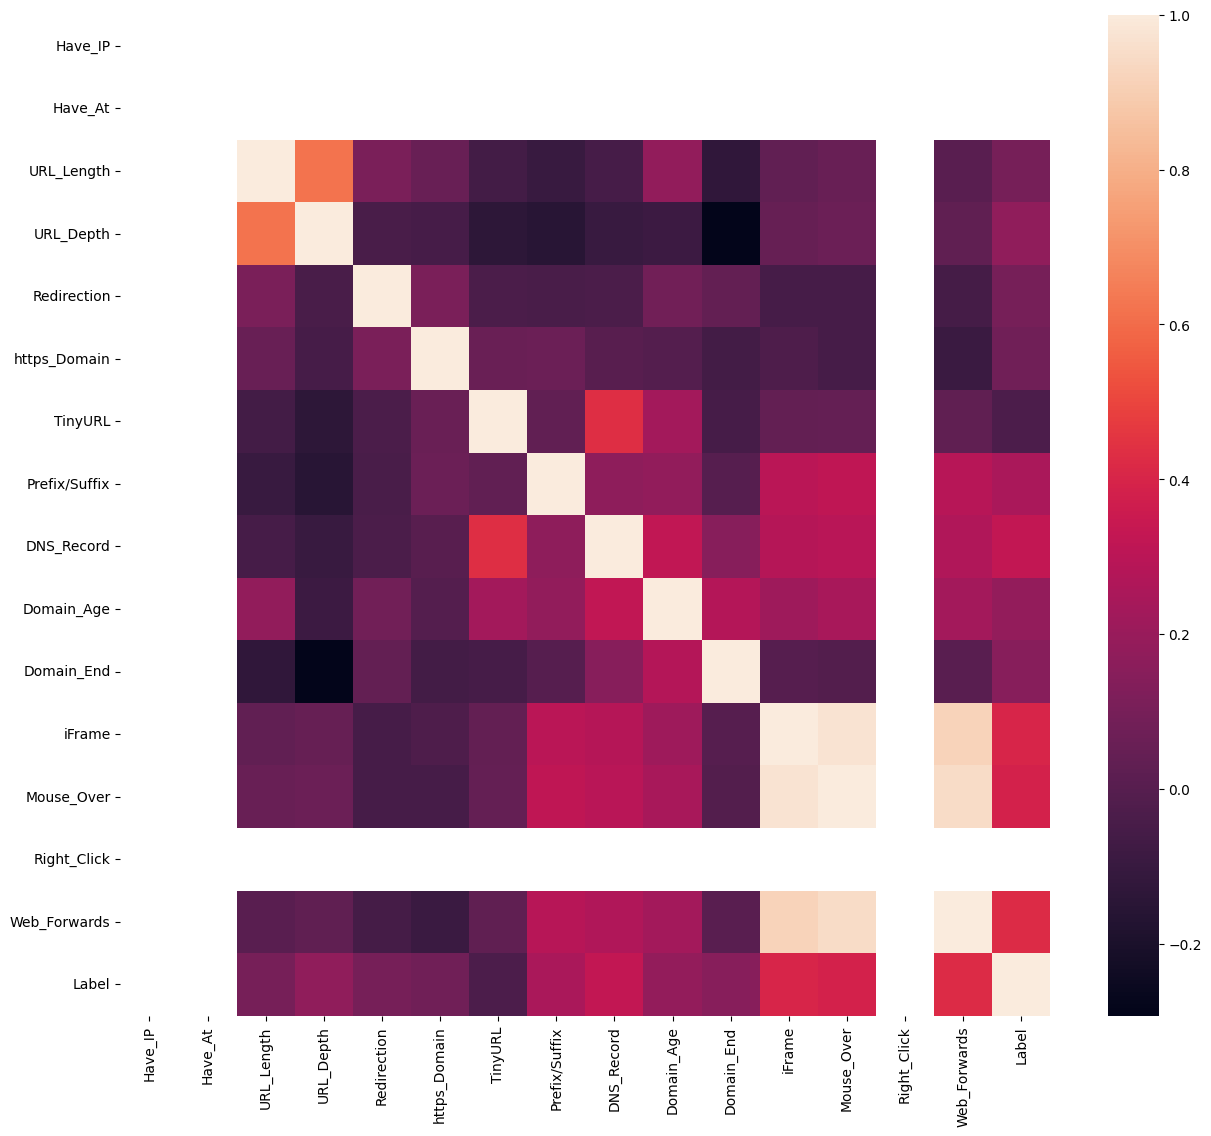

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,100.0,100.0,100.00,100.000000,100.00,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
mean,0.0,0.0,0.45,1.900000,0.01,0.460000,0.110000,0.15000,0.130000,0.590000,0.870000,0.230000,0.220000,1.0,0.240000,0.500000
std,0.0,0.0,0.50,2.071939,0.10,0.500908,0.314466,0.35887,0.337998,0.494311,0.337998,0.422953,0.416333,0.0,0.429235,0.502519
min,0.0,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.0,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.0,0.0,0.00,1.000000,0.00,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.500000
75%,0.0,0.0,1.00,2.000000,0.00,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,0.0,0.0,1.00,11.000000,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngoại trừ cột  'Domain' & 'URL_Depth'. Cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [ ]:
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [ ]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [ ]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,2,0,1,0,0,0,1,1,1,1,1,1,1
1,0,0,0,2,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


# **6. Chia dữ liệu**

In [ ]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((100, 15), (100,))

In [ ]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((80, 15), (20, 15))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 10)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [ ]:
#computing the accuracy
cr_train_tree = classification_report(y_train,y_train_tree)
cr_test_tree = classification_report(y_test,y_test_tree)
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Classification report on training Data  \n",cr_train_tree)
print("Decision Tree: Classification report on test Data \n", cr_test_tree)

Decision Tree: Classification report on training Data  
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        41
           1       1.00      0.67      0.80        39

    accuracy                           0.84        80
   macro avg       0.88      0.83      0.83        80
weighted avg       0.88      0.84      0.83        80

Decision Tree: Classification report on test Data 
               precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



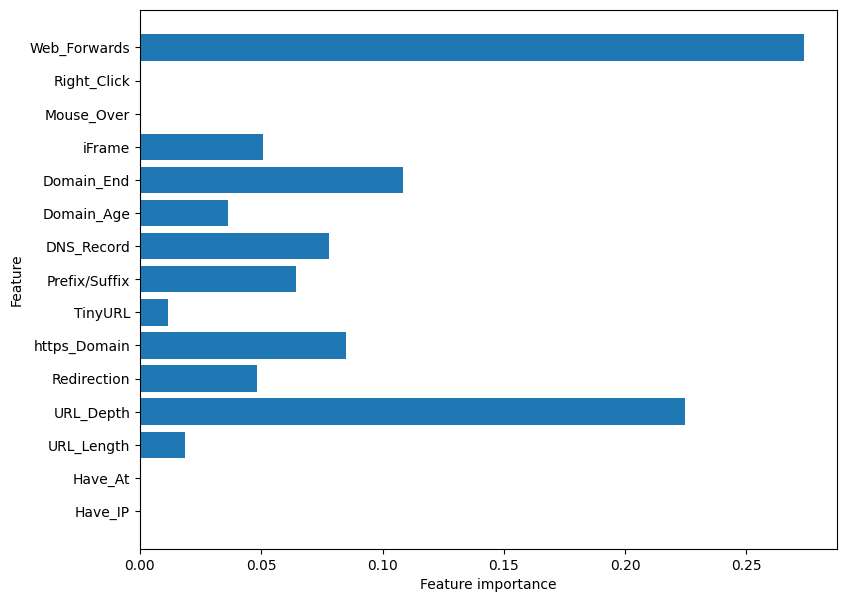

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=10)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
cr_train_forest = classification_report(y_train,y_train_forest)
cr_test_forest = classification_report(y_test,y_test_forest)

print("Random forest: Classification report on training Data: \n", cr_train_forest)
print("Random forest: Classification report on test Data: \n", cr_test_forest)

Random forest: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.88      0.77      0.82        39

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

Random forest: Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.67      0.91      0.77        11

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20



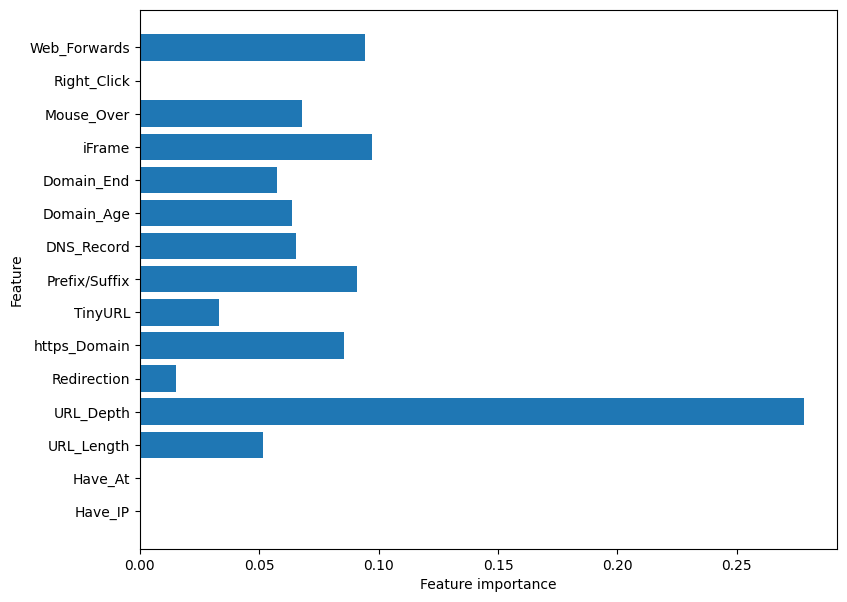

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##**7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
cr_train_mlp = classification_report(y_train,y_train_mlp)
cr_test_mlp = classification_report(y_test,y_test_mlp)

print("Multilayer Perceptrons: Classification report on training Data: \n", cr_train_mlp)
print("Multilayer Perceptrons: Classification report on test Data: \n", cr_test_mlp)

Multilayer Perceptrons: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80

Multilayer Perceptrons: Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.62      0.91      0.74        11

    accuracy                           0.65        20
   macro avg       0.69      0.62      0.60        20
weighted avg       0.68      0.65      0.62        20



**Lưu trữ kết quả**

In [ ]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.01,max_depth=10)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
cr_train_xgb = classification_report(y_train,y_train_mlp)
cr_test_xgb = classification_report(y_test,y_test_mlp)

print("XGBoost: Classification report on training Data: \n",cr_train_xgb)
print("XGBoost : Classification report on test Data: \n",cr_test_xgb)

XGBoost: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80

XGBoost : Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.62      0.91      0.74        11

    accuracy                           0.65        20
   macro avg       0.69      0.62      0.60        20
weighted avg       0.68      0.65      0.62        20



**Lưu trữ kết quả**

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Deep Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert binary labels to one-hot encoded categorical labels
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)
y_train_categorical

model = Sequential()

# Add input layer and first hidden layer
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with validation data
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                256       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 290 (1.13 KB)
Trainable params: 290 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 131ms/step - loss: 0.7406 - accuracy: 0.4750 - val_loss: 0.7514 - val_accuracy: 0.6500
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 0.7360 - accuracy: 0.4750 - val_loss: 0.7454 - val_accuracy: 0.6500
Epoch 3/10
3/3 [==============================] - 0s 38ms/step - loss: 0.7314 - accuracy: 0.4625 - val_loss: 0.7400 - val_accuracy: 0.6500
Ep

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train_label = np.argmax(y_pred_train, axis=-1)
y_pred_test_label = np.argmax(y_pred_test, axis=-1)

1/1 [==============================] - 0s 32ms/step


**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_dnn = accuracy_score(y_train,y_pred_train_label)
acc_test_dnn = accuracy_score(y_test,y_pred_test_label)
cr_train_dnn = classification_report(y_train,y_pred_train_label)
cr_test_dnn = classification_report(y_test,y_pred_test_label)

print("Deep Neural Network: Classification report on training Data: \n",cr_train_dnn)
print("Deep Neural Network : Classification report on test Data: \n",cr_test_dnn)

Deep Neural Network: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.64      0.34      0.44        41
           1       0.53      0.79      0.64        39

    accuracy                           0.56        80
   macro avg       0.59      0.57      0.54        80
weighted avg       0.59      0.56      0.54        80

Deep Neural Network : Classification report on test Data: 
               precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.61      1.00      0.76        11

    accuracy                           0.65        20
   macro avg       0.81      0.61      0.56        20
weighted avg       0.79      0.65      0.58        20



**Lưu trữ kết quả**

In [ ]:
storeResults('Deep Neural Network', acc_train_dnn, acc_test_dnn)

## **7.6. Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.1)
# fit
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
#predicting
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
cr_train_svm = classification_report(y_train,y_train_svm)
cr_test_svm = classification_report(y_test,y_test_svm)

print("Support Vector Machines: Classification report on training Data: \n",cr_train_svm)
print("Support Vector Machines : Classification report on test Data: \n",cr_test_svm)

Support Vector Machines: Classification report on training Data: 
               precision    recall  f1-score   support

           0       0.65      0.90      0.76        41
           1       0.83      0.49      0.61        39

    accuracy                           0.70        80
   macro avg       0.74      0.69      0.68        80
weighted avg       0.74      0.70      0.69        80

Support Vector Machines : Classification report on test Data: 
               precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.62      0.73      0.67        11

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



**Lưu trữ kết quả**

In [ ]:
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

# **8. So sánh các mô hình**

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.838,0.60
1,Random Forest,0.838,0.70
2,Multilayer Perceptrons,0.838,0.65
3,XGBoost,0.788,0.80
4,Deep Neural Network,0.562,0.65
5,Support Vector Machines,0.700,0.60


In [ ]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.788,0.80
1,Random Forest,0.838,0.70
2,Multilayer Perceptrons,0.838,0.65
4,Deep Neural Network,0.562,0.65
0,Decision Tree,0.838,0.60
5,Support Vector Machines,0.700,0.60


# Lưu mô hình

In [ ]:
import pickle

with open("xgb_model2.pkl", "wb") as f:
  pickle.dump(xgb, f)

In [ ]:
!ls

drive		online-valid.csv  phis_legit.csv  urldata.csv	  xgb_model2.pkl
legitimate.csv	phishing.csv	  sample_data	  xgb_model1.pkl


# **Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites